<a href="https://colab.research.google.com/github/anshupandey/Computer-Vision/blob/master/Image_processing_Basic_code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip
!unzip image_data.zip

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as im

# Morphological Analysis
 - adding or removing some specific type of pixels in the image
    
## Erosion - loss of pixels from the object shape

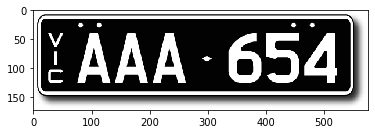

In [0]:
img = cv2.imread(r"image_data\np2.jpg",0)
plt.imshow(img,cmap='gray')
plt.show()

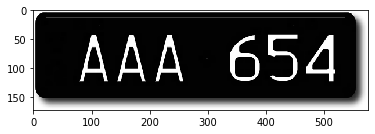

In [0]:
kernel = np.ones((7,7))
img2 = cv2.erode(img,kernel)
plt.imshow(img2,cmap='gray')
plt.show()

## Dilation - Gain of pixels to the object

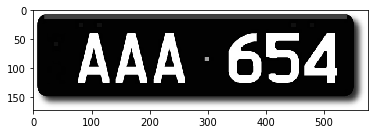

In [0]:
img3 = cv2.dilate(img2,kernel)
plt.imshow(img3,cmap='gray')
plt.show()

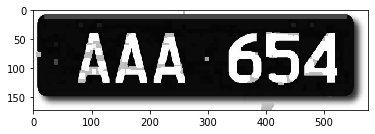

In [0]:
img = cv2.imread(r"image_data\np3.jpg",0)
img2 = cv2.erode(img,kernel)
img3 = cv2.dilate(img2,kernel)
plt.imshow(img3,cmap='gray')
plt.show()

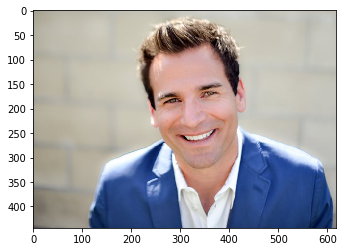

In [0]:
img = im.imread(r"image_data\happy3.jpg")
plt.imshow(img)
plt.show()

In [0]:
fd = cv2.CascadeClassifier(r"image_data\haarcascade_frontalface_alt.xml")
corners = fd.detectMultiScale(img)
corners

array([[214,  96, 213, 213]], dtype=int32)

In [0]:
ed = cv2.CascadeClassifier(r"image_data\haarcascadeeye.xml")

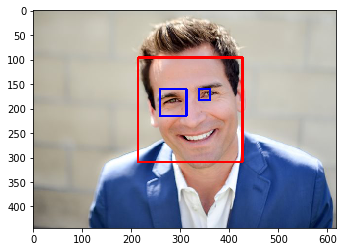

In [0]:
for (x,y,w,h) in corners:
    cv2.rectangle(img,(x,y),(x+w,y+h),[255,0,0],3)
    face = img[y:y+h,x:x+w]
    corners2 = ed.detectMultiScale(face,1.4,5)
    for (ex,ey,ew,eh) in corners2:
        cv2.rectangle(face,(ex,ey),(ex+ew,ey+eh),[0,0,255],3)
plt.imshow(img)
plt.show()

In [0]:
corners2

array([[124,  64,  23,  23],
       [ 44,  64,  55,  55]], dtype=int32)

In [0]:
# this code will not work in google colab, it will work in local machine.
vid = cv2.VideoCapture(0)
fd = cv2.CascadeClassifier(r"image_data\haarcascade_frontalface_alt.xml")
while True:
    flag,img = vid.read()
    corners = fd.detectMultiScale(img)
    if len(corners)!=0:
        for (x,y,w,h) in corners:
            cv2.rectangle(img,(x,y),(x+w,y+h),[255,0,0],3)
    cv2.imshow("video",img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
vid.release()
cv2.destroyAllWindows()